In [4]:
import seaborn as sns
import sys
sys.path.append("..")
import numpy as np
from model.read_train_dev_test import get_train_dev_test
%matplotlib inline
#https://stackoverflow.com/questions/1054271/how-to-import-a-python-class-that-is-in-a-directory-above

In [64]:
_UNIVERSAL_TAGS = (
    'VERB',
    'NOUN',
    'PRON',
    'ADJ',
    'ADV',
    'ADP',
    'CONJ',
    'DET',
    'NUM',
    'PRT',
    'X',
    '.',
)
index_to_tag = _UNIVERSAL_TAGS
tag_to_index = {_UNIVERSAL_TAGS[i]: i for i in range(len(_UNIVERSAL_TAGS))}

In [66]:
_, _, _, trainY, devY, testY = get_train_dev_test(location='../data/')

In [67]:
trainY

array([1, 0, 0, ..., 1, 0, 1])

In [68]:
def get_pos_counts(l):
    counts = np.zeros(len(index_to_tag))
    for i in l:
        counts[i] += 1
    return counts/counts.sum()*100

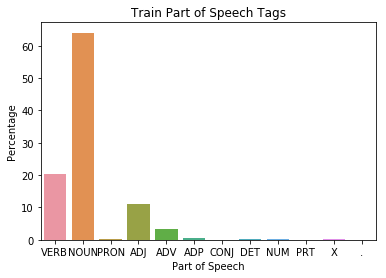

In [32]:
trainAx = sns.barplot(x=list(index_to_tag), y=get_pos_counts(trainY), ci=None)
trainAx.set_title('Train Part of Speech Tags')
trainAx.set(xlabel='Part of Speech', ylabel='Percentage')
train_fig = trainAx.get_figure()
train_fig.savefig('pos_train.png')

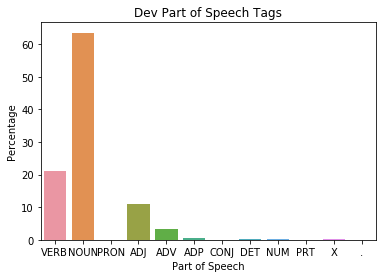

In [33]:
devAx = sns.barplot(x=list(index_to_tag), y=get_pos_counts(devY), ci=None)
devAx.set_title('Dev Part of Speech Tags')
devAx.set(xlabel='Part of Speech', ylabel='Percentage')
dev_fig = devAx.get_figure()
dev_fig.savefig('pos_dev.png')

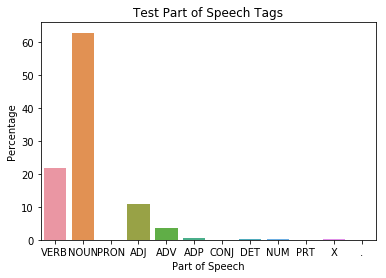

In [70]:
testAx = sns.barplot(x=list(index_to_tag), y=get_pos_counts(testY), ci=None)
testAx.set_title('Test Part of Speech Tags')
testAx.set(xlabel='Part of Speech', ylabel='Percentage')
test_fig = testAx.get_figure()
test_fig.savefig('pos_test.png')

In [28]:
full_accs = [3198/3500]
fifteen_accs = [2293/3500,2285/3500,2283/3500,2300/3500,2278/3500,2284/3500,2357/3500,2216/3500, \
 2334/3500,2317/3500,2319/3500,2297/3500,2336/3500,2243/3500,2361/3500,2330/3500, \
 2329/3500,2247/3500,2386/3500,2320/3500]
sixty_accs = [2693/3500,2684/3500,2734/3500,2762/3500,2777/3500]
one_fifty_accs = [3001/3500, 3049/3500]
full_accs = np.asarray(full_accs)
fifteen_accs = np.asarray(fifteen_accs)
sixty_accs = np.asarray(sixty_accs)
one_fifty_accs = np.asarray(one_fifty_accs)

In [29]:
fifteen_accs.mean(), sixty_accs.mean(), one_fifty_accs.mean(), full_accs.mean()

(0.6587857142857143, 0.78, 0.8642857142857143, 0.9137142857142857)

In [30]:
fifteen_accs.var(), sixty_accs.var(), one_fifty_accs.var(), full_accs.var()

(0.00013621938775510198, 0.00010994285714285707, 4.702040816326506e-05, 0.0)

In [31]:
fifteen_accs

array([0.65514286, 0.65285714, 0.65228571, 0.65714286, 0.65085714,
       0.65257143, 0.67342857, 0.63314286, 0.66685714, 0.662     ,
       0.66257143, 0.65628571, 0.66742857, 0.64085714, 0.67457143,
       0.66571429, 0.66542857, 0.642     , 0.68171429, 0.66285714])

In [58]:
pal = sns.color_palette("GnBu_d")

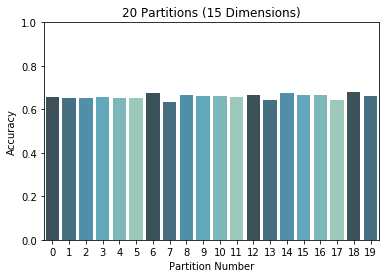

In [59]:
fifteen_ax = sns.barplot(x=list(range(20)), y=fifteen_accs, ci=None, palette=pal)
fifteen_ax.set_title('20 Partitions (15 Dimensions)')
fifteen_ax.set_ylim(0, 1)
fifteen_ax.set(xlabel='Partition Number', ylabel='Accuracy')
fifteen_fig = fifteen_ax.get_figure()
fifteen_fig.savefig('fifteen_accs.png')

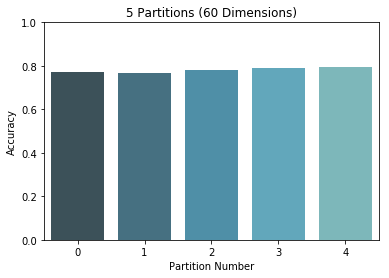

In [60]:
sixty_ax = sns.barplot(x=list(range(5)), y=sixty_accs, ci=None, palette=pal)
sixty_ax.set_title('5 Partitions (60 Dimensions)')
sixty_ax.set_ylim(0, 1)
sixty_ax.set(xlabel='Partition Number', ylabel='Accuracy')
sixty_fig = sixty_ax.get_figure()
sixty_fig.savefig('sixty_accs.png')

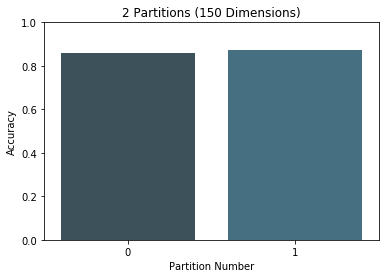

In [61]:
one_fifty_ax = sns.barplot(x=list(range(2)), y=one_fifty_accs, ci=None, palette=pal)
one_fifty_ax.set_title('2 Partitions (150 Dimensions)')
one_fifty_ax.set_ylim(0, 1)
one_fifty_ax.set(xlabel='Partition Number', ylabel='Accuracy')
one_fifty_fig = one_fifty_ax.get_figure()
one_fifty_fig.savefig('one_fifty_accs.png')

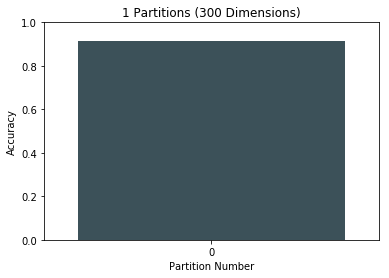

In [62]:
full_ax = sns.barplot(x=list(range(1)), y=full_accs, ci=None, palette=pal)
full_ax.set_title('1 Partitions (300 Dimensions)')
full_ax.set_ylim(0, 1)
full_ax.set(xlabel='Partition Number', ylabel='Accuracy')
full_fig = full_ax.get_figure()
full_fig.savefig('full_accs.png')